# Analiza cen goriv v Sloveniji
V tej seminarski nalogi analiziram gibanje cen različnih goriv (95 oktanski bencin, dizel, kurilno olje, LPG) v Sloveniji na podlagi podatkov iz EU uradne statistike.

Najprej poglejmo cene v zadnjih petih tednih

In [1]:
import pandas as pd

cene = pd.read_csv("cene_slovenija.csv")
cene.head()

,Datum,Cena_95,Cena_Dizel,Cena_Kurilno_Olje,Cena_LPG_Plin
0,2025-07-28,1.43624,1.48793,1.12718,0.85421
1,2025-07-21,1.45192,1.49304,1.12870,0.85429
2,2025-07-14,1.46379,1.49705,1.13583,0.83574
3,2025-07-07,1.45117,1.47332,1.12055,0.83209
4,2025-06-30,1.44350,1.45672,1.09642,0.83064


Cene po tednih

In [26]:
cene[["Datum", "Cena_95", "Cena_Dizel", "Cena_Kurilno_Olje", "Cena_LPG_Plin"]]

,Datum,Cena_95,Cena_Dizel,Cena_Kurilno_Olje,Cena_LPG_Plin
0,2025-07-28,1.43624,1.48793,1.12718,0.85421
1,2025-07-21,1.45192,1.49304,1.12870,0.85429
2,2025-07-14,1.46379,1.49705,1.13583,0.83574
3,2025-07-07,1.45117,1.47332,1.12055,0.83209
4,2025-06-30,1.44350,1.45672,1.09642,0.83064
...,...,...,...,...,...
1020,2005-01-31,0.83622,0.83372,0.48296,0.54392
1021,2005-01-24,0.83622,0.83372,0.48296,0.54392
1022,2005-01-17,0.82037,0.81578,0.48713,0.54392
1023,2005-01-10,0.82034,0.81575,0.48711,0.54390


Graf cen po letih od 2005 naprej

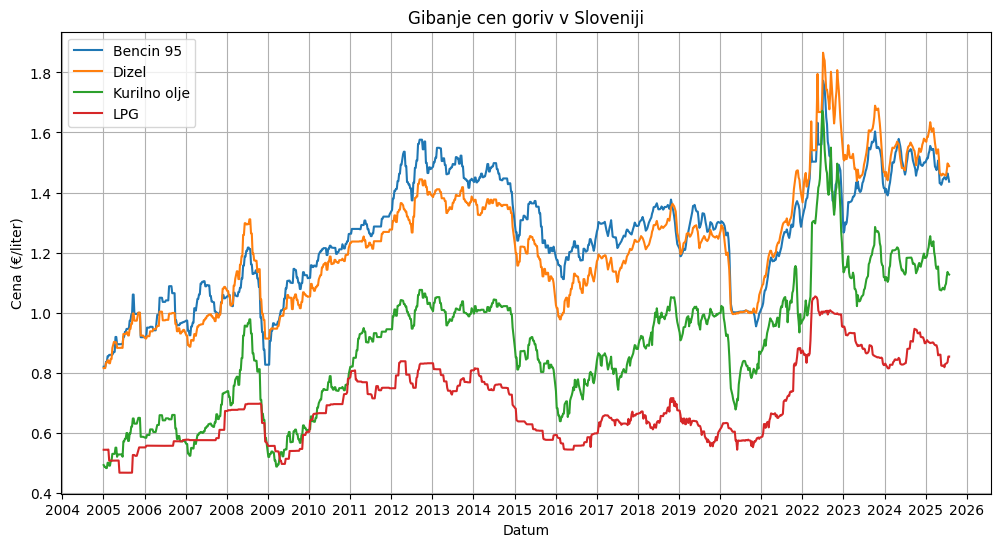

In [ ]:
import matplotlib.pyplot as plot
import matplotlib.dates as mdates

cene["Datum"] = pd.to_datetime(cene["Datum"])

plot.figure(figsize=(12, 6))
plot.plot(cene["Datum"], cene["Cena_95"], label="Bencin 95")
plot.plot(cene["Datum"], cene["Cena_Dizel"], label="Dizel")
plot.plot(cene["Datum"], cene["Cena_Kurilno_Olje"], label="Kurilno olje")
plot.plot(cene["Datum"], cene["Cena_LPG_Plin"], label="LPG")

plot.gca().xaxis.set_major_locator(mdates.YearLocator())
plot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plot.xlabel("Datum")
plot.ylabel("Cena (€/liter)")
plot.title("Gibanje cen goriv v Sloveniji")
plot.legend()
plot.grid(True)
plot.show()

Povprečna cena po letih

In [22]:
cene["Leto"] = cene["Datum"].dt.year
povprecja = cene.groupby("Leto")[["Cena_95", 
                                  "Cena_Dizel", 
                                  "Cena_Kurilno_Olje", 
                                  "Cena_LPG_Plin"]].mean().sort_index(ascending=False)
povprecja

,Cena_95,Cena_Dizel,Cena_Kurilno_Olje,Cena_LPG_Plin
Leto,,,,
2025,1.484423,1.531434,1.151876,0.868803
2024,1.493025,1.525847,1.166288,0.869632
2023,1.449541,1.543389,1.143001,0.888942
2022,1.493333,1.636747,1.325856,0.975012
2021,1.222659,1.276024,0.996000,0.708404
2020,1.067312,1.061605,0.829494,0.590085
2019,1.284848,1.250307,0.978934,0.611849
2018,1.325768,1.281315,0.966023,0.659535
2017,1.269537,1.175984,0.830317,0.641746


Razlika med bencinom 95 in dizlom skozi leta (pozitivni del pomeni da je dizel dražji od bencina in negativni del obratno)

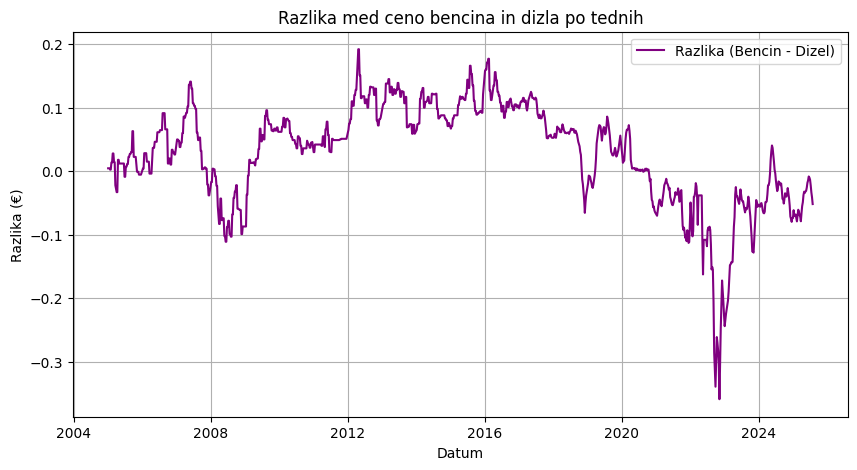

In [24]:
cene["Razlika"] = cene["Cena_95"] - cene["Cena_Dizel"]
plot.figure(figsize=(10, 5))
plot.plot(cene["Datum"], cene["Razlika"], label="Razlika (Bencin - Dizel)", color="purple")
plot.title("Razlika med ceno bencina in dizla po tednih")
plot.ylabel("Razlika (€)")
plot.xlabel("Datum")
plot.grid(True)
plot.legend()
plot.show()

Najmanjše cene bencina 95 v zadnjih 20-ih letih

In [32]:
najmanjse_cene_95 = cene.nsmallest(10, "Cena_95")[["Datum", "Cena_95"]]
najmanjse_cene_95

,Datum,Cena_95
1023,2005-01-10,0.82034
1024,2005-01-03,0.82034
1022,2005-01-17,0.82037
827,2009-01-12,0.82700
828,2009-01-05,0.82700
829,2008-12-15,0.82700
830,2008-12-08,0.82700
1020,2005-01-31,0.83622
1021,2005-01-24,0.83622
1018,2005-02-14,0.85506


Ter še najmanjše cene Dizla v zadnjih 20-ih letih

In [31]:
najmanjse_cene_Dizel = cene.nsmallest(10, "Cena_Dizel")[["Datum", "Cena_Dizel"]]
najmanjse_cene_Dizel

,Datum,Cena_Dizel
1023,2005-01-10,0.81575
1024,2005-01-03,0.81575
1022,2005-01-17,0.81578
1017,2005-02-21,0.83170
1016,2005-02-28,0.83187
1020,2005-01-31,0.83372
1021,2005-01-24,0.83372
1018,2005-02-14,0.84129
1019,2005-02-07,0.84136
1014,2005-03-14,0.84606


Zdaj pa še 10 največjih cen bencina 95 v zadnjih 20-ih letih

In [36]:
največje_cene_95 = cene.nlargest(10, 'Cena_95')[["Datum", "Cena_95"]]
največje_cene_95

,Datum,Cena_95
160,2022-07-04,1.77232
159,2022-07-11,1.75965
158,2022-07-18,1.74670
157,2022-07-25,1.70463
156,2022-08-01,1.65069
167,2022-05-16,1.63243
155,2022-08-08,1.62744
161,2022-06-27,1.60653
94,2023-10-09,1.60337
95,2023-10-02,1.58043


Zdaj pa še 10 največjih cen dizla v zadnjih 20-ih letih

In [37]:
največje_cene_DIzela = cene.nlargest(10, 'Cena_Dizel')[["Datum", "Cena_Dizel"]]
največje_cene_DIzela

,Datum,Cena_Dizel
160,2022-07-04,1.86551
159,2022-07-11,1.84835
158,2022-07-18,1.83933
142,2022-11-07,1.80755
150,2022-09-12,1.80221
167,2022-05-16,1.79485
157,2022-07-25,1.79200
141,2022-11-14,1.77027
149,2022-09-19,1.76046
156,2022-08-01,1.74297


Tukaj pa je še gladki graf cen za bencin 95.

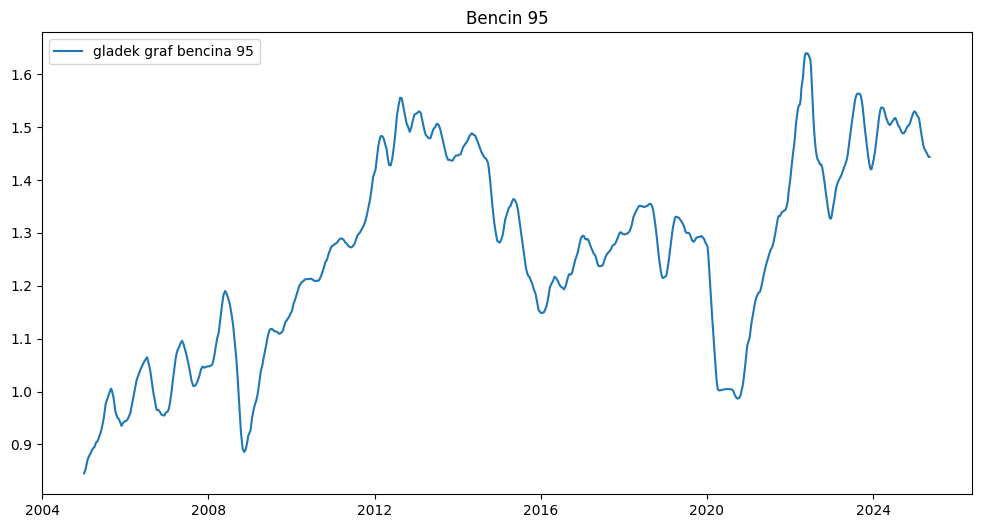

In [48]:
cene['gladko_95'] = cene['Cena_95'].rolling(window=12).mean()
plot.figure(figsize=(12,6))
plot.plot(cene['Datum'], cene['gladko_95'], label='gladek graf bencina 95')
plot.legend()
plot.title('Bencin 95')
plot.show()


Poglejmo še če mesec kaj vpliva na ceno Bencina 95.

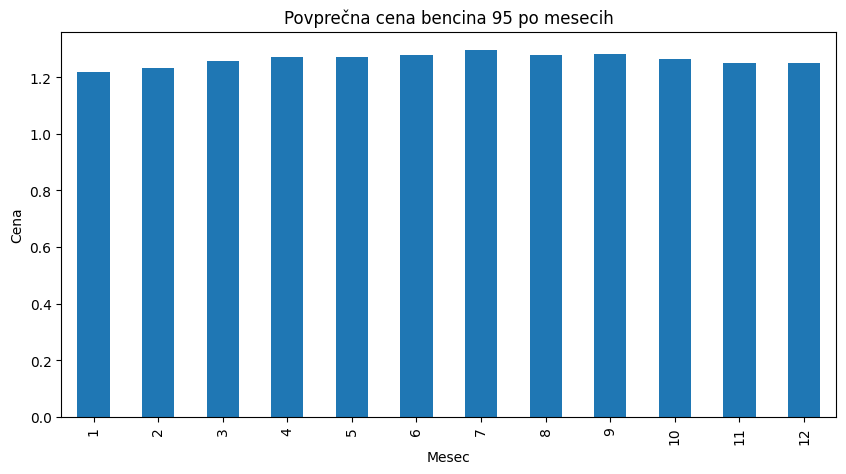

In [ ]:
cene['Mesec'] = cene['Datum'].dt.month
mesečni_povprecji = cene.groupby('Mesec')['Cena_95'].mean()
plot.figure(figsize=(10,5))
mesečni_povprecji.plot(kind='bar')
plot.title('Povprečna cena bencina 95 po mesecih')
plot.xlabel('Mesec')
plot.ylabel('Cena')
plot.show()